In [10]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
from utils.plot_trajectory_2d import plot_levels, plot_trajectory
from sklearn.datasets import load_svmlight_file
from tqdm import tqdm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
from task3.optimization import barrier_method_lasso
from task3.oracles import lasso_duality_gap

In [41]:
n = 300
m = 500
b_noise_ampl = 0.0001
A = np.random.rand(m, n)
x_true = np.random.rand(n)
b = A.dot(x_true.T) + np.random.rand(m)*b_noise_ampl
reg_coef = 1

x0 = np.random.rand(n)
u0 = x0 + 1

x, message, history = barrier_method_lasso(A, b, reg_coef, x0, u0, tolerance=1e-7,
                                           lasso_duality_gap=lasso_duality_gap, trace=True)
print(message)

success


## Вариация $\varepsilon_{inner}$ 

In [70]:
e_histories = []

n = 300
m = 500
b_noise_ampl = 0.0001
A = np.random.rand(m, n)
x_true = np.random.rand(n)
b = A.dot(x_true.T) + np.random.rand(m)*b_noise_ampl
reg_coef = 1

x0 = np.random.rand(n)
u0 = x0 + 1

for e in tqdm([10**i for i in range(-3, -12, -2)]):
    x, message, history = barrier_method_lasso(A, b, reg_coef, x0, u0, tolerance=1e-7, tolerance_inner=e,
                                       lasso_duality_gap=lasso_duality_gap, trace=True)
    e_histories.append(history)

100%|██████████| 5/5 [00:07<00:00,  1.48s/it]


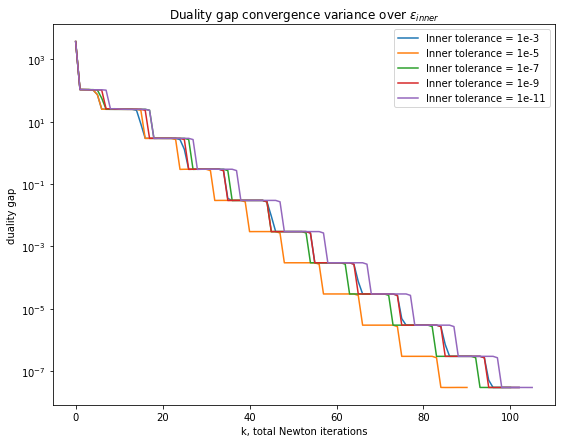

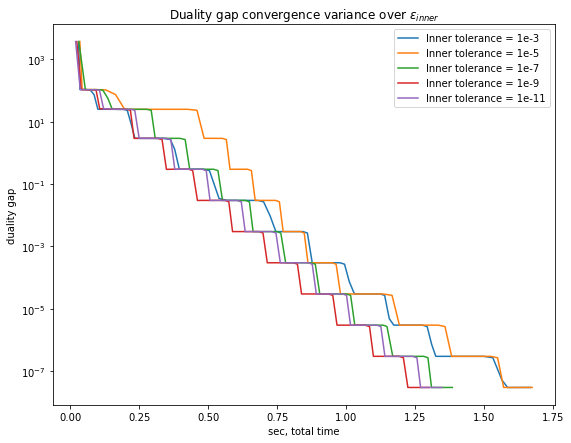

In [71]:
figure(figsize=(9, 7))
for e, hist in zip(range(-3, -12, -2), e_histories):
    semilogy(hist["duality_gap"], label=r"Inner tolerance = 1e%d"%e)
xlabel("k, total Newton iterations")
ylabel("duality gap")
title(r"Duality gap convergence variance over $\varepsilon_{inner}$")
legend()

figure(figsize=(9, 7))
for e, hist in zip(range(-3, -12, -2), e_histories):
    semilogy(hist["time"], hist["duality_gap"], label=r"Inner tolerance = 1e%d"%e)
xlabel("sec, total time")
ylabel("duality gap")
title(r"Duality gap convergence variance over $\varepsilon_{inner}$")
legend()

___

## Вариация $\gamma$

In [82]:
e_histories = []

n = 300
m = 500
b_noise_ampl = 0.0001
A = np.random.rand(m, n)
x_true = np.random.rand(n)
b = A.dot(x_true.T) + np.random.rand(m)*b_noise_ampl
reg_coef = 1
grid = range(1, 8, 2)

x0 = np.random.rand(n)
u0 = x0 + 1

for gamma in tqdm([10**i for i in grid]):
    x, message, history = barrier_method_lasso(A, b, reg_coef, x0, u0, tolerance=1e-7, gamma=gamma,
                                       lasso_duality_gap=lasso_duality_gap, trace=True)
    e_histories.append(history)


100%|██████████| 4/4 [00:03<00:00,  1.08it/s]


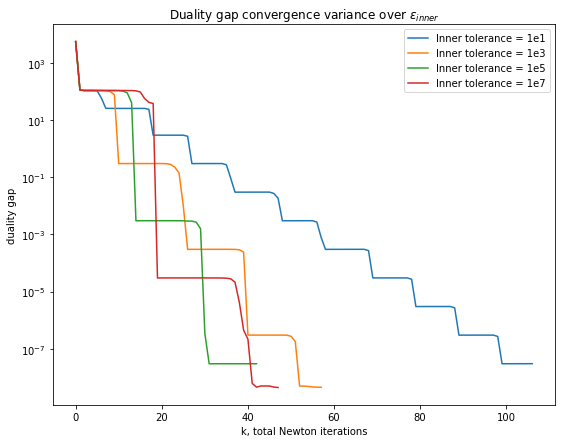

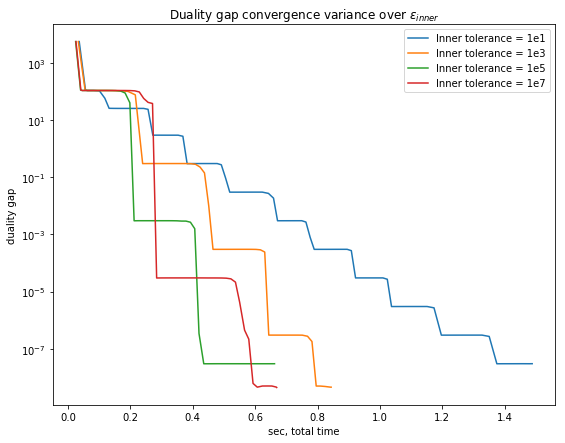

In [83]:
figure(figsize=(9, 7))
for e, hist in zip(grid, e_histories):
    semilogy(hist["duality_gap"], label=r"\gamma = 1e%d"%e)
xlabel("k, total Newton iterations")
ylabel("duality gap")
title(r"Duality gap convergence variance over $\varepsilon_{inner}$")
legend()

figure(figsize=(9, 7))
for e, hist in zip(grid, e_histories):
    semilogy(hist["time"], hist["duality_gap"], label=r"\gamma = 1e%d"%e)
xlabel("sec, total time")
ylabel("duality gap")
title(r"Duality gap convergence variance over $\varepsilon_{inner}$")
legend()

---

## Вариация n 

In [99]:
e_histories = []
grid = range(100, 701, 200)

for n in tqdm(grid):
    m = 1001
    b_noise_ampl = 0.01
    A = np.random.rand(m, n)
    x_true = np.random.rand(n)
    b = A.dot(x_true.T) + np.random.rand(m)*b_noise_ampl
    reg_coef = 1
    x0 = np.random.rand(n)
    u0 = x0 + 1
    
    x, message, history = barrier_method_lasso(A, b, reg_coef, x0, u0, tolerance=1e-7,
                                       lasso_duality_gap=lasso_duality_gap, trace=True)
    e_histories.append(history)


 50%|█████     | 2/4 [00:01<00:01,  1.19it/s]
Exception in thread Thread-18:
Traceback (most recent call last):
  File "/Users/aksholokhov/.anaconda/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/aksholokhov/.anaconda/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/aksholokhov/.anaconda/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 4/4 [00:12<00:00,  3.17s/it]


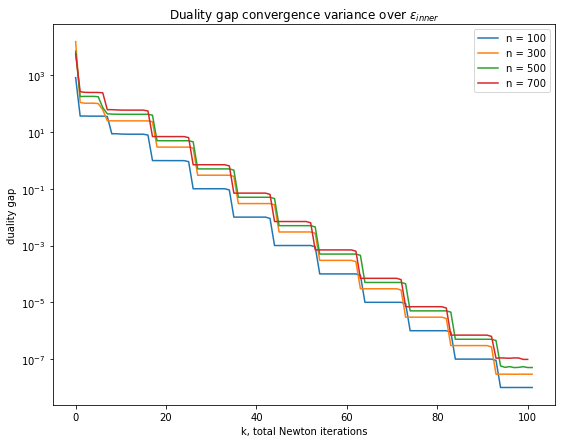

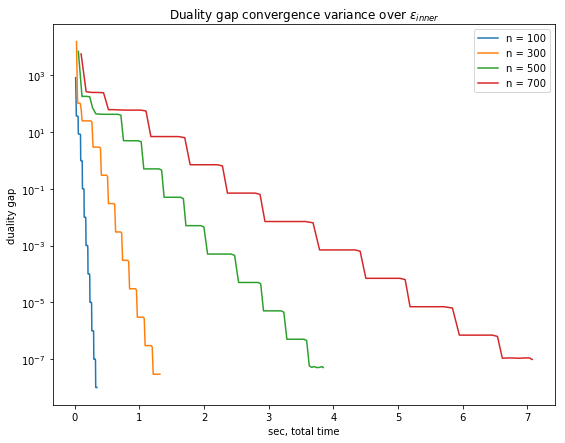

In [100]:
figure(figsize=(9, 7))
for e, hist in zip(grid, e_histories):
    semilogy(hist["duality_gap"], label=r"n = %d"%e)
xlabel("k, total Newton iterations")
ylabel("duality gap")
title(r"Duality gap convergence variance over $\varepsilon_{inner}$")
legend()

figure(figsize=(9, 7))
for e, hist in zip(grid, e_histories):
    semilogy(hist["time"], hist["duality_gap"], label=r"n = %d"%e)
xlabel("sec, total time")
ylabel("duality gap")
title(r"Duality gap convergence variance over $\varepsilon_{inner}$")
legend()